In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import h5py
from matplotlib import pyplot as plt
from palettable.cartocolors.sequential import agSunset_6
from palettable.cartocolors.diverging import Temps_5
from sklearn.metrics import r2_score
from rdkit.Chem.Descriptors import MolWt
from rdkit import Chem

plt.style.use("publication")

# NOT IN USE

Depreceated in favor of the one in the `estimator_training` folder.

In [6]:
df = pd.read_csv("../../scripts/demoset_results.csv").sort_values("distance")

In [7]:
df

,svr,gpr,knn,linear,rfr,gbr,smiles,distance,truth
0,12.979110,13.079179,13.079181,13.071934,12.773374,13.079192,C=O,0.000000,13.079181
1,13.520119,13.620132,13.620136,14.466445,13.142372,13.618925,C=S,1.935449,13.620136
2,11.702540,11.602082,11.602060,11.836111,12.009835,11.603746,O=C1=CC=1,4.453004,11.602060
3,11.927318,11.919080,11.919078,12.041812,12.011524,11.918171,N#CC1=CC=CC1,9.400460,11.919078
4,12.137801,12.238045,12.238046,12.363190,12.093700,12.237258,N#CC1=CC=CC=C1,10.480410,12.238046
5,12.882020,12.982228,12.982271,12.898660,11.953692,12.980050,C1=Cc2ccccc2C1,12.897043,12.982271
6,11.783507,11.866275,11.866287,11.710880,11.636889,11.866664,N#CC1=CC=CC2=CC=CC=C12,15.346677,11.866287
7,11.747791,11.848174,11.848189,11.938085,11.823757,11.848075,N#CC1=CC2=CC=CC=C2C=C1,15.516820,11.848189


In [8]:
df["name"] = ["H$_2$CO", "H$_2$CS", "HC$_3$O", "c-C$_5$H$_5$CN", "c-C$_6$H$_5$CN", "C$_{9}$H$_{8}$", "1-c-C$_{10}$H$_7$CN", "2-c-C$_{10}$H$_7$CN",]

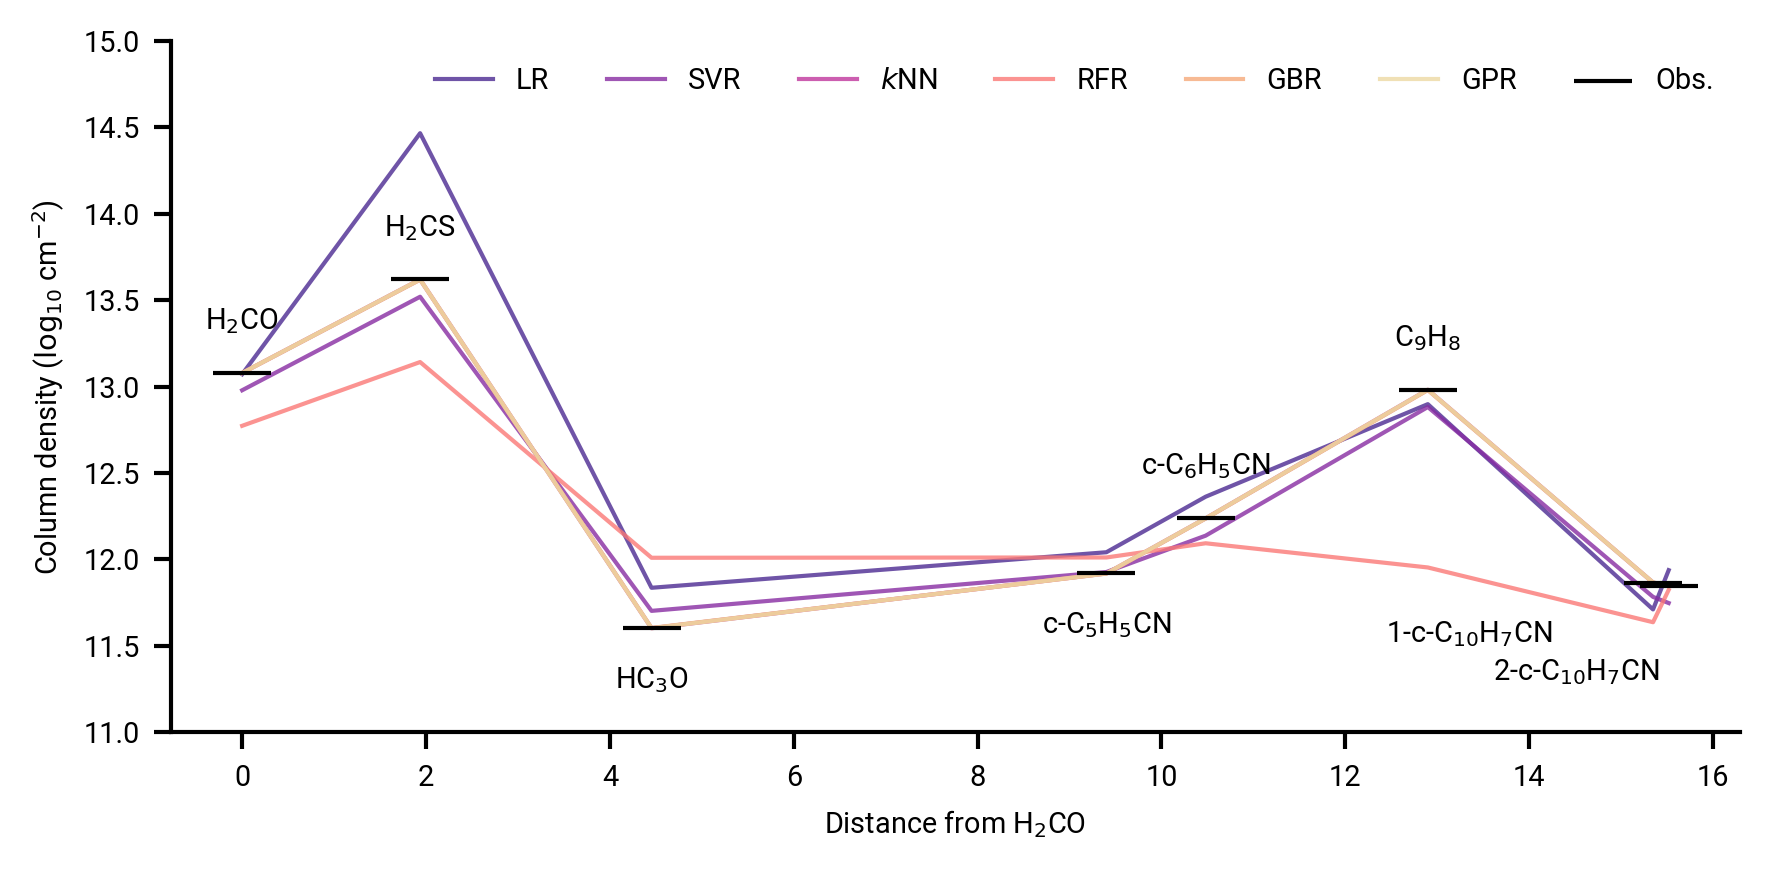

In [9]:
fig, ax = plt.subplots(figsize=(6, 3))

for color, method, label in zip(agSunset_6.hex_colors, ["linear", "svr", "knn", "rfr", "gbr", "gpr"], ["LR", "SVR", "$k$NN", "RFR", "GBR", "GPR"]):
    ax.plot(df["distance"], df[method], color=color, alpha=0.8, label=label)
ax.scatter(df["distance"], df["truth"], marker="_", s=200, c="k", label="Obs.", zorder=10)

for index, row in df.iterrows():
    if row["name"] == "1-c-C$_{10}$H$_7$CN":
        yoffset = 0.5
        xoffset = -1.
    else:
        yoffset = 0.3
        xoffset = 0.
    if row["name"] in ["HC$_3$O", "c-C$_5$H$_5$CN"]:
        yoffset -= 0.6
    if index > 5:
        xoffset -= 1.
        yoffset -= 0.8
    else:
        xoffset = 0.
    ax.text(row["distance"] + xoffset, row["truth"] + yoffset, row["name"], fontsize="x-small", verticalalignment="center", horizontalalignment="center")

ax.set(xlabel="Distance from H$_2$CO", ylabel="Column density ($\log_{10}$ cm$^{-2}$)", ylim=[11., 15.])
ax.legend(ncol=7, loc=1, fontsize="x-small")

fig.savefig("../../reports/figures/demoset.pdf", dpi=300)

In [10]:
df = pd.read_csv("../../scripts/tmc1_results.csv")

In [11]:
df.keys()

Index(['Molecule', 'Formula', 'SMILES', 'Column density (cm^-2)', 'DOI',
       'Isotopologue', 'Upper Limit', 'Notes', 'canonical', 'vectors', 'svr',
       'gpr', 'knn', 'linear', 'rfr', 'gbr', 'distance'],
      dtype='object')

In [12]:
def get_mol_weight(smi: str):
    mol = Chem.MolFromSmiles(smi, sanitize=False)
    mol.UpdatePropertyCache(strict=False)
    return MolWt(mol)

In [13]:
df["Weight"] = df["canonical"].apply(get_mol_weight)
df["Norm"] = (df["Weight"] / df["Weight"].max()) * 20.

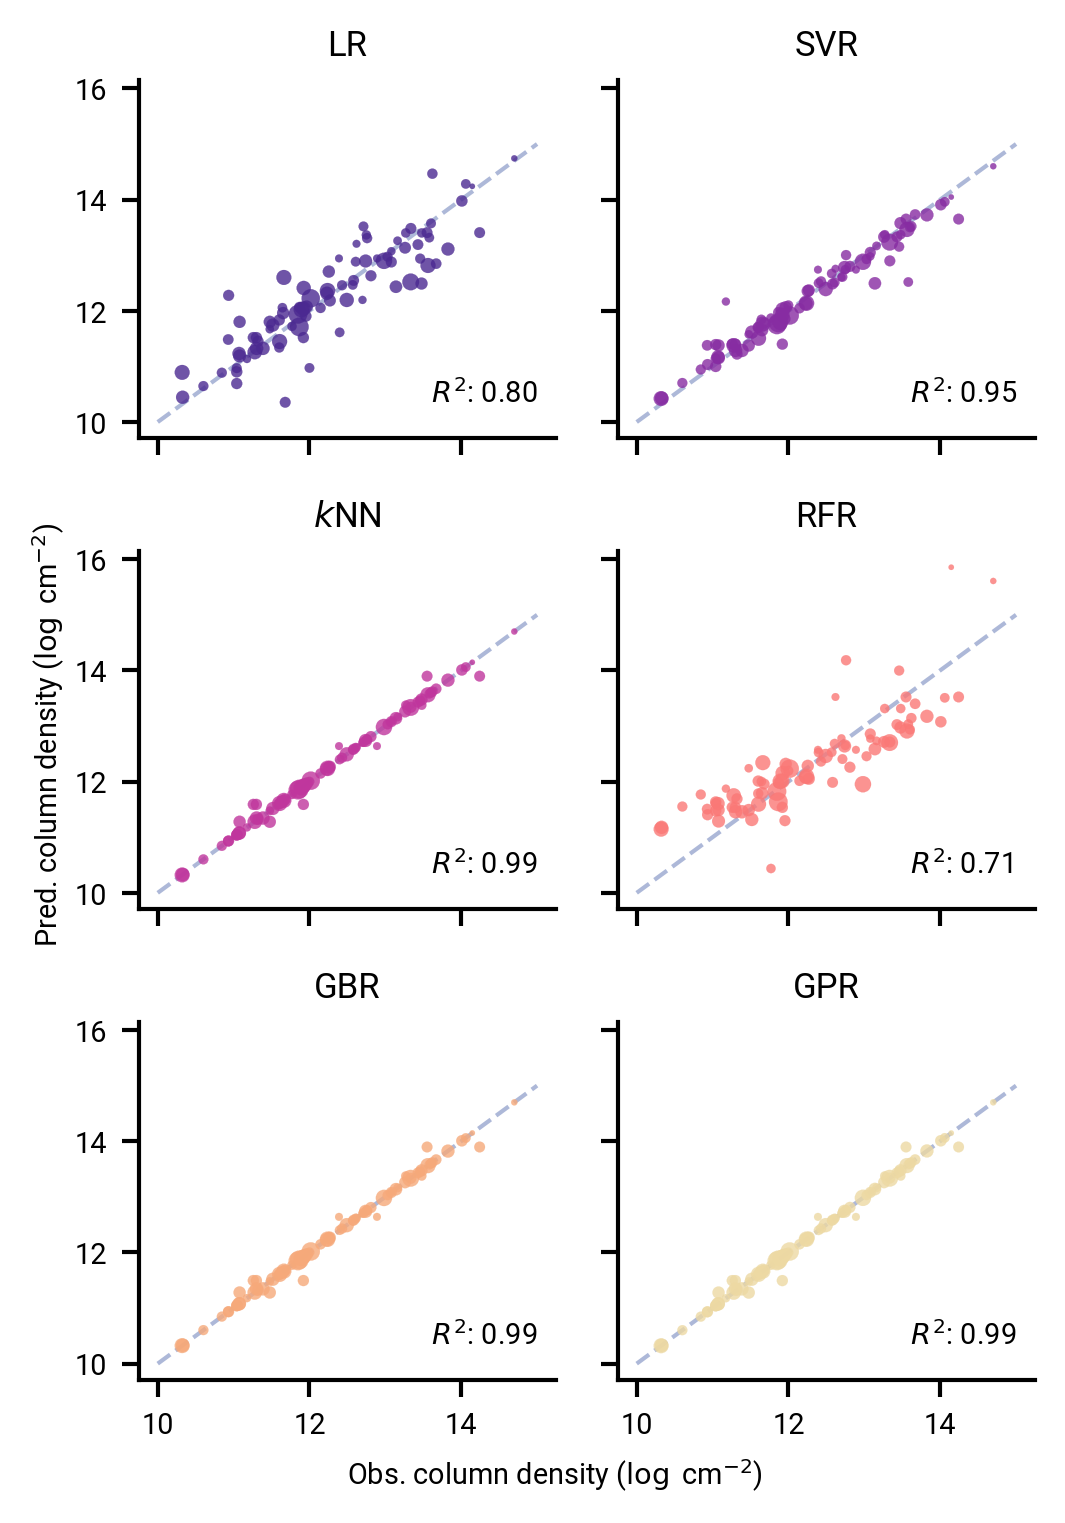

In [14]:
fig, axarray = plt.subplots(3, 2, figsize=(3.5,5.), sharex=True, sharey=True)

for index, (ax, method, label, color) in enumerate(zip(axarray.ravel(), ["linear", "svr", "knn", "rfr", "gbr", "gpr"], ["LR", "SVR", "$k$NN", "RFR", "GBR", "GPR"], agSunset_6.hex_colors)):
    ax.scatter(np.log10(df["Column density (cm^-2)"]), df[method], label=label, s=df["Norm"], c=color, linewidths=0.05, alpha=0.8, zorder=5)
    ax.set(title=label)
    ax.plot(np.arange(10., 16.), np.arange(10., 16.), ls="--", alpha=0.4)
    r2 = r2_score(np.log10(df["Column density (cm^-2)"]), df[method])
    ax.text(0.7, 0.1, f"$R^2$: {r2:.2f}", transform=ax.transAxes, fontsize="x-small")
fig.text(0.5, 0.0, "Obs. column density ($\log$ cm$^{-2}$)", ha="center", fontsize="x-small")
fig.text(0., 0.5, "Pred. column density ($\log$ cm$^{-2}$)", va="center", rotation="vertical", fontsize="x-small")
fig.tight_layout()
fig.savefig("../../reports/figures/r2_plot.pdf", dpi=300)

In [15]:
np.argmax(np.abs(df["gbr"] - np.log10(df["Column density (cm^-2)"])))

26

In [16]:
df.iloc[26]

Molecule                                   1-Oxopropadiene-3-ylideneradical
Formula                                                                 C3O
SMILES                                                           [C]#C[C]=O
Column density (cm^-2)                                       832000000000.0
DOI                                              10.3847/0067-0049/225/2/46
Isotopologue                                                              0
Upper Limit                                                               0
Notes                                                      Kaifu survey obs
canonical                                                            C#CC=O
vectors                   [[-0.5861105  -0.8528857  -0.7340647   0.23193...
svr                                                               11.400951
gpr                                                               11.493747
knn                                                               11.590097
linear      

## UMAP predictions

In [178]:
umap_data = h5py.File("../../data/processed/recommendation_umap.h5", "r")
predictions = pd.read_csv("../../scripts/tmc1_recommendations.csv")

In [179]:
umap_vecs = np.array(umap_data["umap"])
# umap_vecs = umap_vecs[np.array(predictions["tmc1_cluster_mask"]),:]

In [180]:
predictions["norm"] = predictions["gpr_column"] / predictions["gpr_column"].max()

In [181]:
not_tmc_mask = ~np.array(umap_data["tmc1_mask"])

In [182]:
from mpl_toolkits.mplot3d import Axes3D

In [232]:
outliers = np.arange(len(df))[umap_vecs[~not_tmc_mask,0] > 10.]

In [235]:
cluster1_idx, cluster2_idx = outliers[0], outliers[-1]

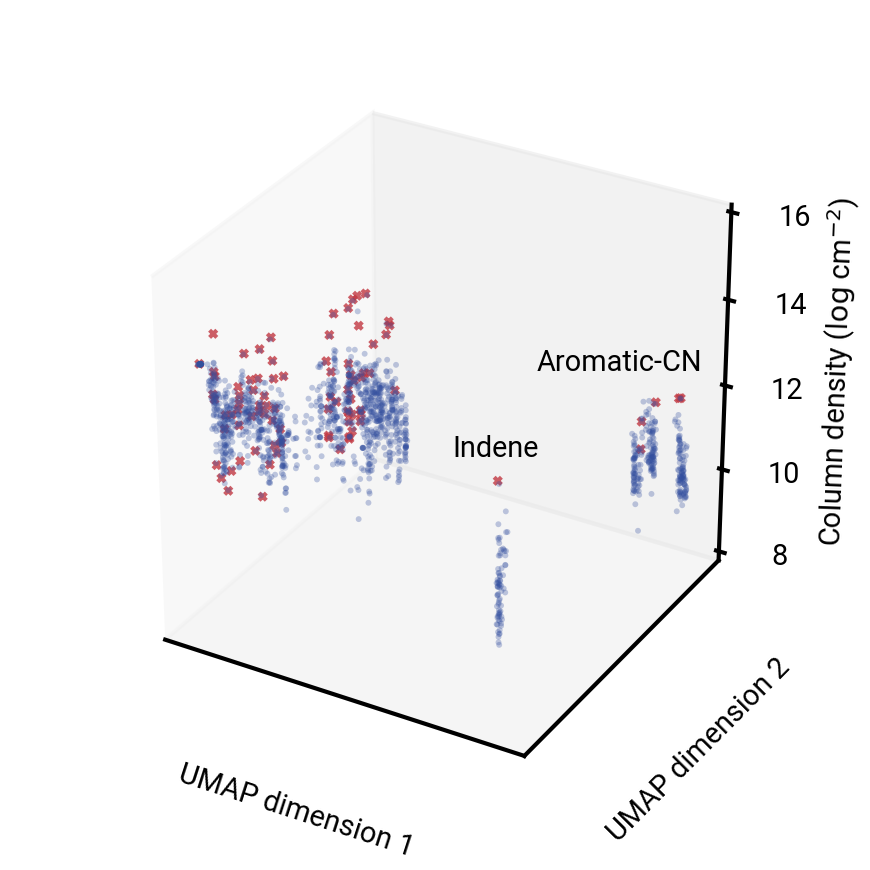

In [254]:
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(projection='3d')

plot = ax.scatter(umap_vecs[not_tmc_mask,0], umap_vecs[not_tmc_mask,1], predictions["gpr_column"], alpha=0.3, s=2., linewidths=0.0, zorder=3)
ax.scatter(umap_vecs[~not_tmc_mask,0], umap_vecs[~not_tmc_mask,1], np.log10(df["Column density (cm^-2)"]), alpha=0.8, s=3., marker="x", zorder=10)
ax.text(
    umap_vecs[cluster1_idx,0] - 6., umap_vecs[cluster1_idx,1], np.log10(df["Column density (cm^-2)"]).iloc[cluster1_idx] + 0.5, "Aromatic-CN", fontsize="x-small"
)
ax.text(
    umap_vecs[cluster2_idx,0] - 2.5, umap_vecs[cluster2_idx,1], np.log10(df["Column density (cm^-2)"]).iloc[cluster1_idx] + 1.3, "Indene", fontsize="x-small"
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set(yticks=[], xticks=[], zticks=[8, 10, 12, 14, 16], xlabel="UMAP dimension 1", ylabel="UMAP dimension 2")
ax.set_zlabel("Column density ($\log$ cm$^{-2}$)", fontsize="x-small")
ax.set_zticklabels([8, 10, 12, 14, 16], fontsize="x-small")
ax.grid(False)
ax.zaxis.labelpad = 0.
ax.xaxis.labelpad = 0.
ax.yaxis.labelpad = 0.
ax.dist = 11.
fig.tight_layout()
fig.subplots_adjust(left=-5)

fig.savefig("../../reports/figures/3d_umap_recommendations.pdf", dpi=300, transparent=True)

In [284]:
cov_matrix = np.load("../../scripts/tmc1_recommendations_cov.npy")

In [285]:
# cov_matrix[np.eye(cov_matrix.shape[0], dtype=bool)] = 0.

In [288]:
cov_matrix[:,0]

array([ 1.74812848e-02,  6.59735254e-05,  5.37663353e-05, ...,
        5.19535944e-05, -1.75515556e-04,  3.01126120e-04])

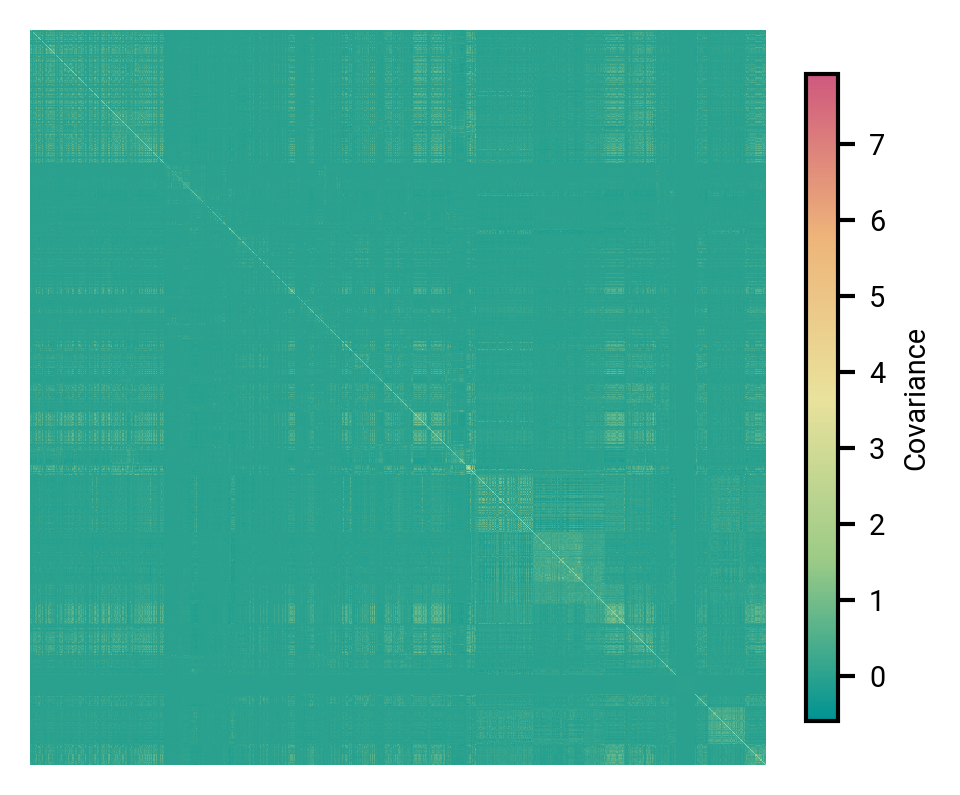

In [289]:
fig, ax = plt.subplots(figsize=(3.3,3))

plot = ax.imshow(cov_matrix[87:,87:], cmap=Temps_5.mpl_colormap)
fig.colorbar(plot, ax=ax, fraction=0.04, label="Covariance")
ax.set(xticks=[], yticks=[])
for spine in ["left", "bottom"]:
    ax.spines[spine].set_visible(False)
fig.savefig("../../reports/figures/rec_covariance.pdf", dpi=300)